In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

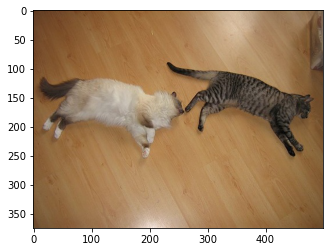

In [2]:
img = "../data/interim/images/000019.jpg"
image = plt.imread(img)
plt.imshow(image)

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [10]:
harris_laplace = cv2.xfeatures2d.HarrisLaplaceFeatureDetector_create()

In [16]:
kp = harris_laplace.detect(image, None)

In [20]:
x = cv2.drawKeypoints(image,kp,image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

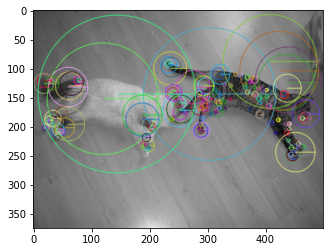

In [22]:
plt.imshow(x)

In [29]:
kp[8].pt

(205.0, 201.0)

In [30]:
keypoint = kp[8].pt

In [32]:
k = 0
stopping = False
x = keypoint
X = []
sigma = 1
t = 1.4

In [56]:
I_xx = cv2.Sobel(image, cv2.CV_64F, dx=2, dy=0)
I_yy = cv2.Sobel(image, cv2.CV_64F, dx=0, dy=2)

In [69]:
dog_s = []
S = [sigma/t, sigma, sigma*t]
for s in S:
    I_xx = cv2.Sobel(cv2.GaussianBlur(image, (3,3), s), cv2.CV_64F, dx=2, dy=0)
    I_xx = cv2.Sobel(cv2.GaussianBlur(image, (3,3), s), cv2.CV_64F, dx=0, dy=2)
    dog = s**2 * abs(I_xx[int(keypoint[0]), int(keypoint[1])] + I_yy[int(keypoint[0]), int(keypoint[1])])
    dog_s.append(dog)

new_sigma = S[np.argmax(dog_s)]

In [70]:
sigma_D = 

1.4

In [71]:
dog_s

[19.387755102040817, 50.0, 111.71999999999998]

In [36]:
mser = cv2.MSER_create()

In [38]:
mser_areas, _ = mser.detectRegions(image)

In [40]:
mser_areas[0]

array([[ 16, 121],
       [ 15, 121],
       [ 16, 123],
       ...,
       [ 12, 129],
       [ 23, 148],
       [ 52, 148]], dtype=int32)

In [31]:
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in mser_areas[0]]

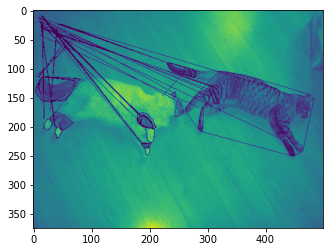

In [32]:
plt.imshow(cv2.polylines(image, hulls, 1, (0, 255, 0)))

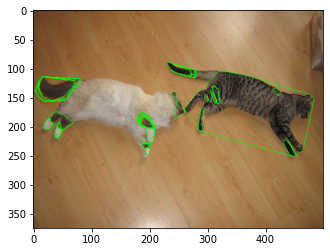

In [6]:
mser = cv2.MSER_create()
vis = image.copy()

#detect regions in gray scale image
regions, _ = mser.detectRegions(gray)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(vis, hulls, 1, (0, 255, 0))

plt.imshow(vis)

In [11]:
mask = np.zeros((image.shape[0], image.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(image, image, mask=mask)

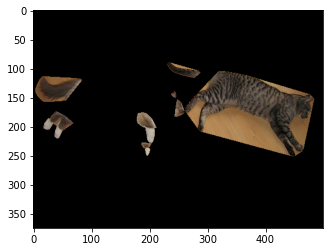

In [12]:
plt.imshow(text_only)